In [24]:
import os
import pandas as pd
import glob

# Define folders
r2_folder = "outputs/emulator_r2/r2_values"
aggregate_folder = "outputs/emulator_r2/aggregate"

# Make sure aggregate folder exists
os.makedirs(aggregate_folder, exist_ok=True)

# Find all r2 text files in the r2_values folder
r2_files = glob.glob(os.path.join(r2_folder, "r2_*.txt"))
data = []

for fname in r2_files:
    n_samples = int(os.path.basename(fname).split("_")[1].split(".")[0])
    with open(fname) as f:
        r2 = float(f.read().strip())
    data.append({"n_samples": n_samples, "R2": r2})

# Build and display the summary table
results = pd.DataFrame(data).sort_values("n_samples")
print(results)

# Save the aggregate table in outputs/emulator_r2/aggregate/
agg_path = os.path.join(aggregate_folder, "r2_aggregate_table.csv")
results.to_csv(agg_path, index=False)
print(f"Aggregate table saved to {agg_path}")

   n_samples      R2
0       1024  0.5522
1       2048  0.6215
Aggregate table saved to outputs/emulator_r2/aggregate/r2_aggregate_table.csv


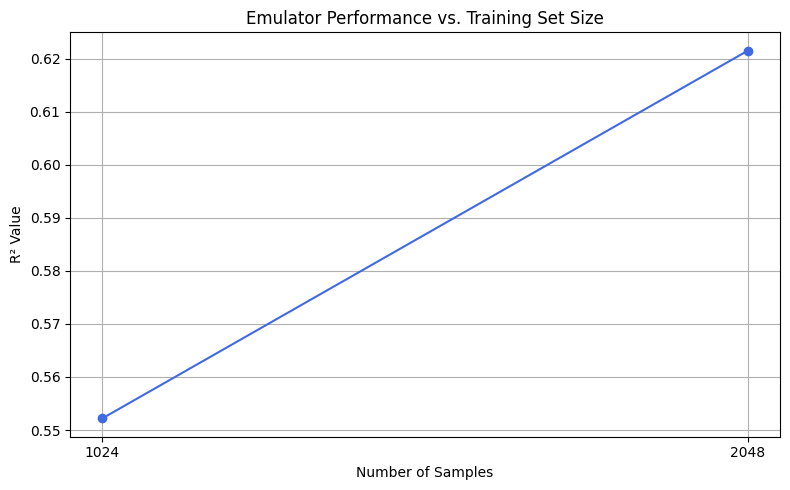

Aggregate plot saved to outputs/emulator_r2/aggregate/r2_vs_samples.png


In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(results['n_samples'], results['R2'], marker='o', linestyle='-', color='royalblue')
plt.xlabel('Number of Samples')
plt.ylabel('R² Value')
plt.title('Emulator Performance vs. Training Set Size')

# Set x-axis ticks to your sample sizes as strings for clarity
plt.xticks(results['n_samples'], [str(n) for n in results['n_samples']])

plt.grid(True)
plt.tight_layout()

plot_path = os.path.join(aggregate_folder, "r2_vs_samples.png")
plt.savefig(plot_path)
plt.show()
print(f"Aggregate plot saved to {plot_path}")